Final probability of intrusion given evidences is equal to 0.3136


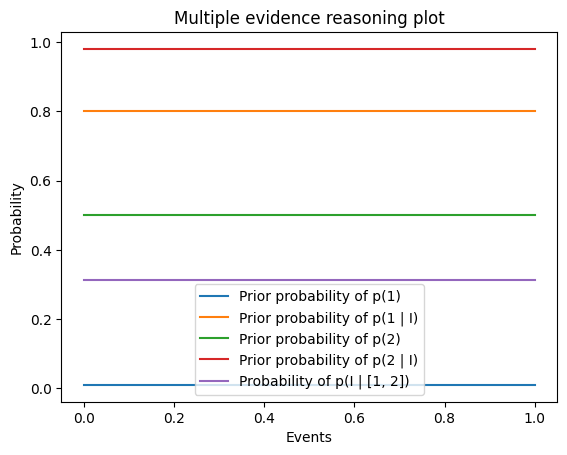

In [13]:
import matplotlib.pyplot as plt
import numpy as np


class MultipleEvidenceReasoning:
  def __init__(self, p_intrusion: float, evidences: list[float], evidences_if_intrusion: list[float]):
    self.p_intrusion = p_intrusion
    self.evidences = evidences
    self.evidences_if_intrusion = evidences_if_intrusion
    if len(self.evidences) != len(self.evidences_if_intrusion):
      raise Exception('There have to be the same amount of probabilities of evidences and probabilities of evidences given intrusion')
    self.plot_intrusion_if_evidences()  # Default probability given both evidences


  def plot_intrusion_if_evidences(self, evidences_presence = None) -> None:
    if evidences_presence is None:
      evidences_presence = [True] * len(self.evidences)  # Default value, all evidences are present

    p = self.p_intrusion
    for i in range(len(self.evidences)):
      if evidences_presence[i] is True:
        p = p * self.evidences_if_intrusion[i] / self.evidences[i]  # If evidence was present
      else:
        p = p * (1 - self.evidences_if_intrusion[i]) / (1 - self.evidences[i])  # Invert the probability if the evidence wasn't present

    # Plotting below
    for i in range(len(self.evidences)):
      plt.plot([0, 1], [self.evidences[i], self.evidences[i]], label=f'Prior probability of p({i+1 if evidences_presence[i] is True else "¬" + str(i+1)})')
      plt.plot([0, 1], [self.evidences_if_intrusion[i], self.evidences_if_intrusion[i]], label=f'Prior probability of p({i+1 if evidences_presence[i] is True else "¬" + str(i+1)} | I)')
    print(f'Final probability of intrusion given evidences is equal to {p}')
    plt.plot([0, 1], [p, p], label=f'Probability of p(I | {[i if evidences_presence[i-1] is True else "¬" + str(i) for i in range(1, len(self.evidences) + 1)]})')
    plt.title('Multiple evidence reasoning plot')
    plt.xlabel('Events')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()


mer = MultipleEvidenceReasoning(0.002, [0.01, 0.5], [0.8, 0.98])  # Object construction with values from lecture (first scenario)

Above we have the code of MultipleEvidenceReasoning and the basic example with values from the lecture. The output is same as in the first scenario. Now we will cover the next scenarios

Final probability of intrusion given evidences is equal to 0.0064000000000000055


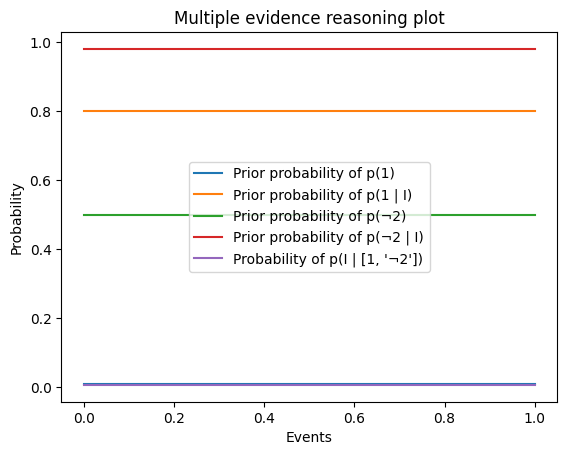

Final probability of intrusion given evidences is equal to 0.0007919191919191917


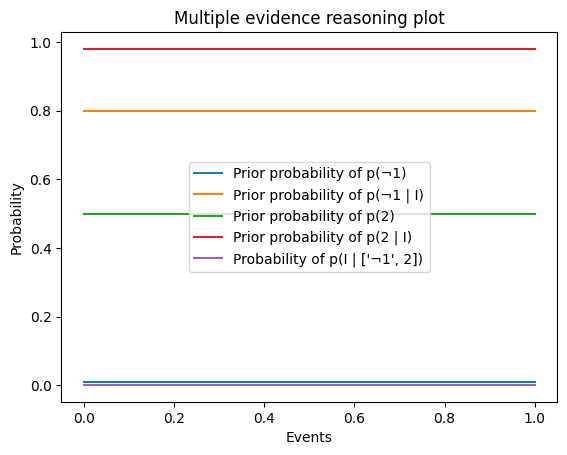

In [10]:
mer.plot_intrusion_if_evidences([True, False])  # Scenario 2: dog didn't bark
mer.plot_intrusion_if_evidences([False, True])  # Scenario 3: alarm didn't go off

The outputs are still consistent with the lecture examples taking into account lack of particular evidences. But what about situation when the alarm is not silent – it blares horn and flashes light when it goes off. Can computations still be performed in the same manner?

No. The computations cannot be performed in the same manner as the evidence events of dog barking and alarm going off are no longer independent. The dog will be affected by the alarm. As the A and B are no longer
conditionally independent given I, 𝑝(𝑎, 𝑏 | 𝐼) is no longer equal to 𝑝(𝑎 | 𝐼)𝑝( 𝑏 | 𝐼)